In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

In [2]:
ROOT = "C:/Users/Emile/Documents/Polytechnique/4A/ParisSaclay/Stage/spinal_cross_species_V1/"

# Mouse

In [20]:
# Load mouse neurons
mouse_neurons = sc.read_h5ad(ROOT + "data/annotated_data/mouse_neurons+skinnider+knaf14.h5ad")

In [21]:
mouse_neurons

AnnData object with n_obs × n_vars = 28221 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'doublet_finder', 'percent_mito', 'keep', 'nCount_SCT', 'nFeature_SCT', 'GFP', 'RNA_snn_res.2', 'seurat_clusters', 'training_labels', 'citeseq', 'annotation', 'labels_xgb', 'labels_svm', 'v1'
    var: 'vf_vst_counts.BOUV5_mean', 'vf_vst_counts.BOUV5_variance', 'vf_vst_counts.BOUV5_variance.expected', 'vf_vst_counts.BOUV5_variance.standardized', 'vf_vst_counts.BOUV5_variable', 'vf_vst_counts.BOUV5_rank', 'vf_vst_counts.KATHE_mean', 'vf_vst_counts.KATHE_variance', 'vf_vst_counts.KATHE_variance.expected', 'vf_vst_counts.KATHE_variance.standardized', 'vf_vst_counts.KATHE_variable', 'vf_vst_counts.KATHE_rank', 'vf_vst_counts.MATSON_mean', 'vf_vst_counts.MATSON_variance', 'vf_vst_counts.MATSON_variance.expected', 'vf_vst_counts.MATSON_variance.standardized', 'vf_vst_counts.MATSON_variable', 'vf_vst_counts.MATSON_rank', 'vf_vst_counts.KNAF3_mean', 'vf_vst_counts.KNAF3_variance', '

In [22]:
mouse_neurons.obs['orig.ident'].value_counts()

orig.ident
GSM7474503    6784
KNAF14        6039
GSE7474501    4260
KNAF3         3265
KATHE         2331
MATSON        2305
KNAF4         1820
BOUV5         1417
Name: count, dtype: int64

In [23]:
mouse_neurons.obs['annotation'].groupby(mouse_neurons.obs['orig.ident']).value_counts()

C:\Users\Emile\AppData\Local\Temp\ipykernel_7256\571748847.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mouse_neurons.obs['annotation'].groupby(mouse_neurons.obs['orig.ident']).value_counts()


orig.ident  annotation      
BOUV5       Not_V1_predicted    1401
            V1_predicted          16
            GFP+                   0
            GFP-                   0
GSE7474501  Not_V1_predicted    3951
            V1_predicted         309
            GFP+                   0
            GFP-                   0
GSM7474503  Not_V1_predicted    6603
            V1_predicted         181
            GFP+                   0
            GFP-                   0
KATHE       Not_V1_predicted    2256
            V1_predicted          75
            GFP+                   0
            GFP-                   0
KNAF3       GFP-                3227
            V1_predicted          38
            GFP+                   0
            Not_V1_predicted       0
KNAF4       GFP+                1807
            Not_V1_predicted      13
            GFP-                   0
            V1_predicted           0
KNAF14      Not_V1_predicted    4066
            V1_predicted        1973
         

In [24]:
sc.neighbors.neighbors(mouse_neurons, use_rep = 'X_rpca')
sc.tl.umap(mouse_neurons)

In [29]:
mouse_neurons.obs['annotation']

BOUV5_M1_SC1_280421_AAACCTGCAGGGTACA-1    Not_V1_predicted
BOUV5_M1_SC1_280421_AAACCTGGTGAGCGAT-1    Not_V1_predicted
BOUV5_M1_SC1_280421_AAACCTGGTGTTAAGA-1    Not_V1_predicted
BOUV5_M1_SC1_280421_AAACGGGCAATAGAGT-1    Not_V1_predicted
BOUV5_M1_SC1_280421_AAACGGGGTGGTAACG-1    Not_V1_predicted
                                                ...       
KNAF14_TTTGTCAGTTCGTTGA-1                     V1_predicted
KNAF14_TTTGTCATCAAAGTAG-1                 Not_V1_predicted
KNAF14_TTTGTCATCCACGTTC-1                 Not_V1_predicted
KNAF14_TTTGTCATCGGCTTGG-1                 Not_V1_predicted
KNAF14_TTTGTCATCGTCCAGG-1                     V1_predicted
Name: annotation, Length: 28221, dtype: category
Categories (4, object): ['GFP+', 'GFP-', 'Not_V1_predicted', 'V1_predicted']

In [32]:
mouse_neurons.obs['annotation'] = mouse_neurons.obs['annotation'].cat.reorder_categories(['GFP+','V1_predicted', 'GFP-', 'Not_V1_predicted'])

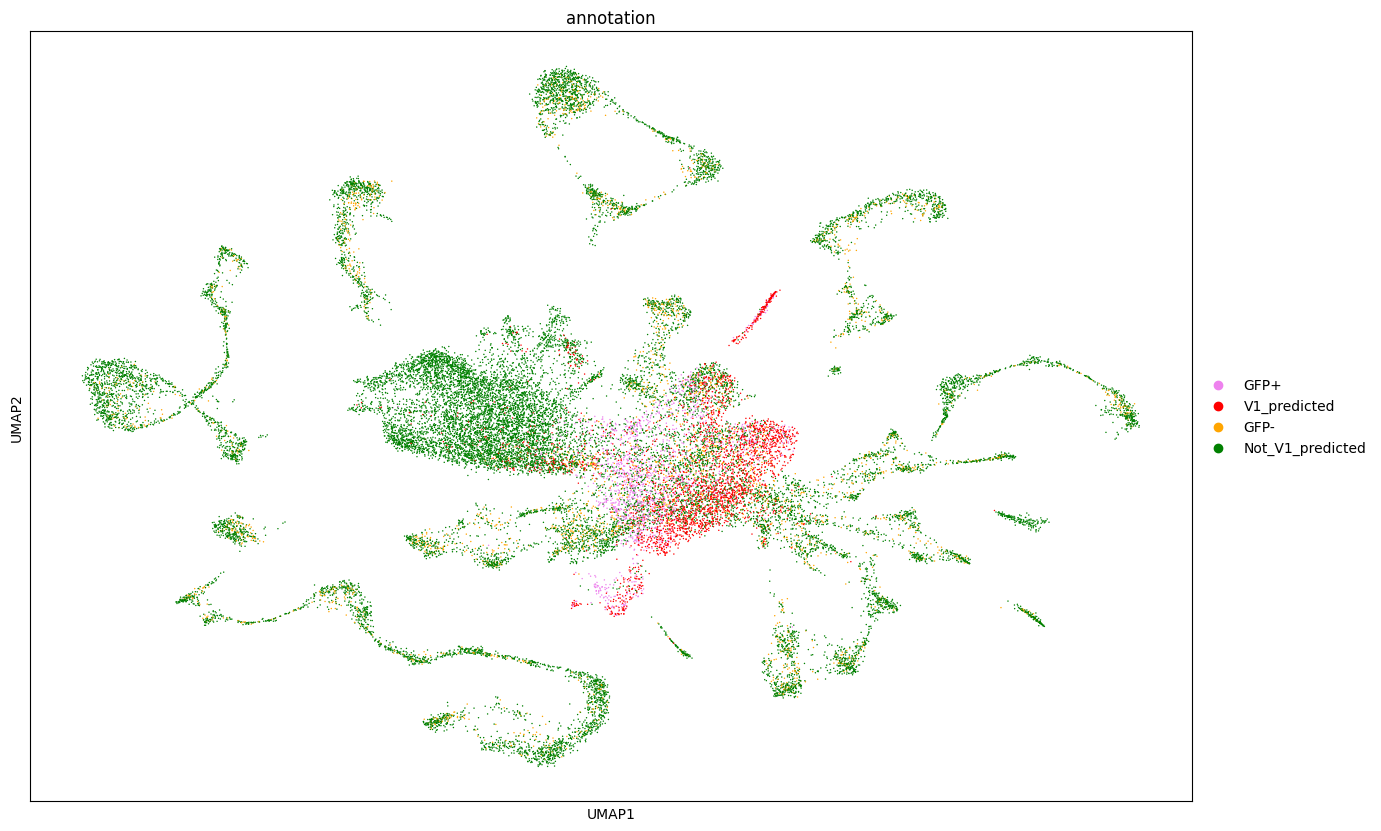

In [33]:
fig, ax = plt.subplots(1,1, figsize = (15,10))
sc.pl.umap(mouse_neurons, color = 'annotation', ax =ax )

In [26]:
mouse_neurons.obs['annotation'].value_counts()

annotation
Not_V1_predicted    20529
GFP-                 3227
V1_predicted         2658
GFP+                 1807
Name: count, dtype: int64

In [ ]:
# Find markers for the V1 group
sc.tl.rank_genes_groups(mouse_neurons, groupby='v1', method = 'wilcoxon', tie_correct=True)
sc.tl.filter_rank_genes_groups(mouse_neurons, min_fold_change=3)

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (
c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:357: RuntimeWarning: invalid value encountered in divide
  scores[group_index, :] = (


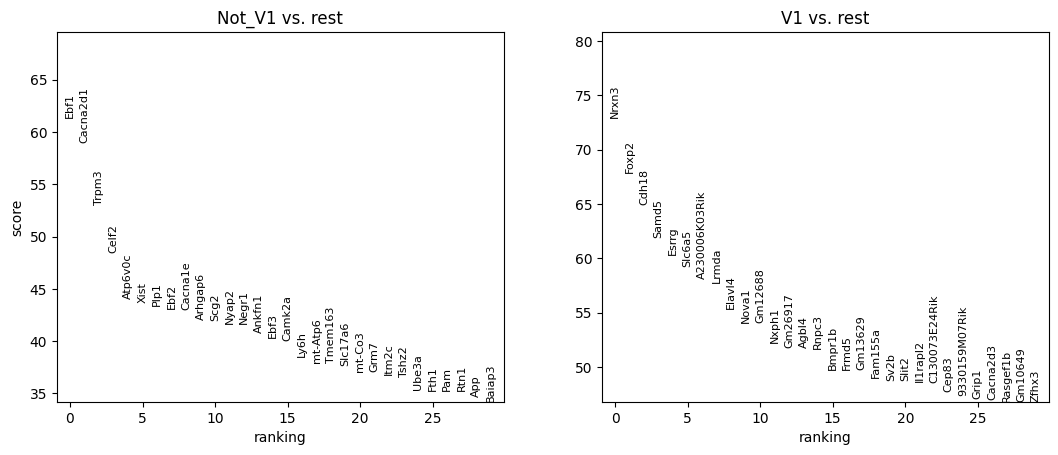

In [13]:
sc.pl.rank_genes_groups(mouse_neurons, n_genes=30, sharey=False)

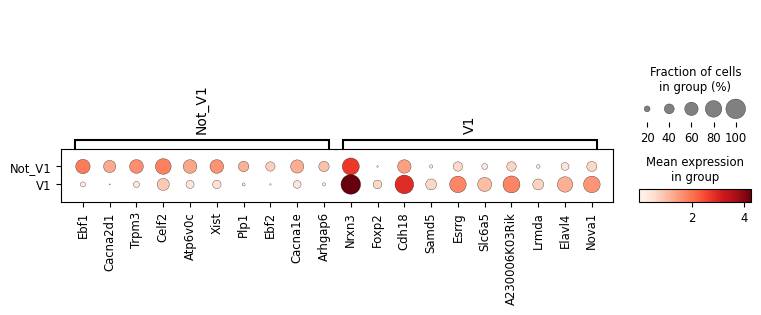

In [14]:
sc.pl.rank_genes_groups_dotplot(mouse_neurons)

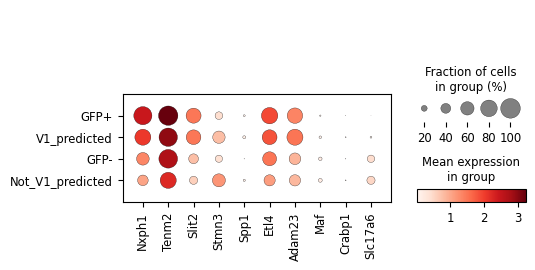

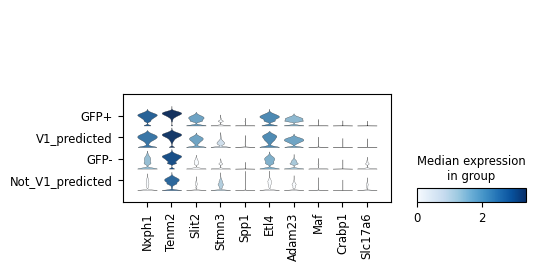

In [34]:
genes_skinnider = ['Nxph1', 'Tenm2', 'Slit2', 'Stmn3', 'Spp1', 'Etl4', 'Adam23', 'Maf', 'Crabp1', 'Slc17a6']

sc.pl.dotplot(mouse_neurons, genes_skinnider, groupby='annotation')

sc.pl.stacked_violin(mouse_neurons, genes_skinnider, groupby='annotation')

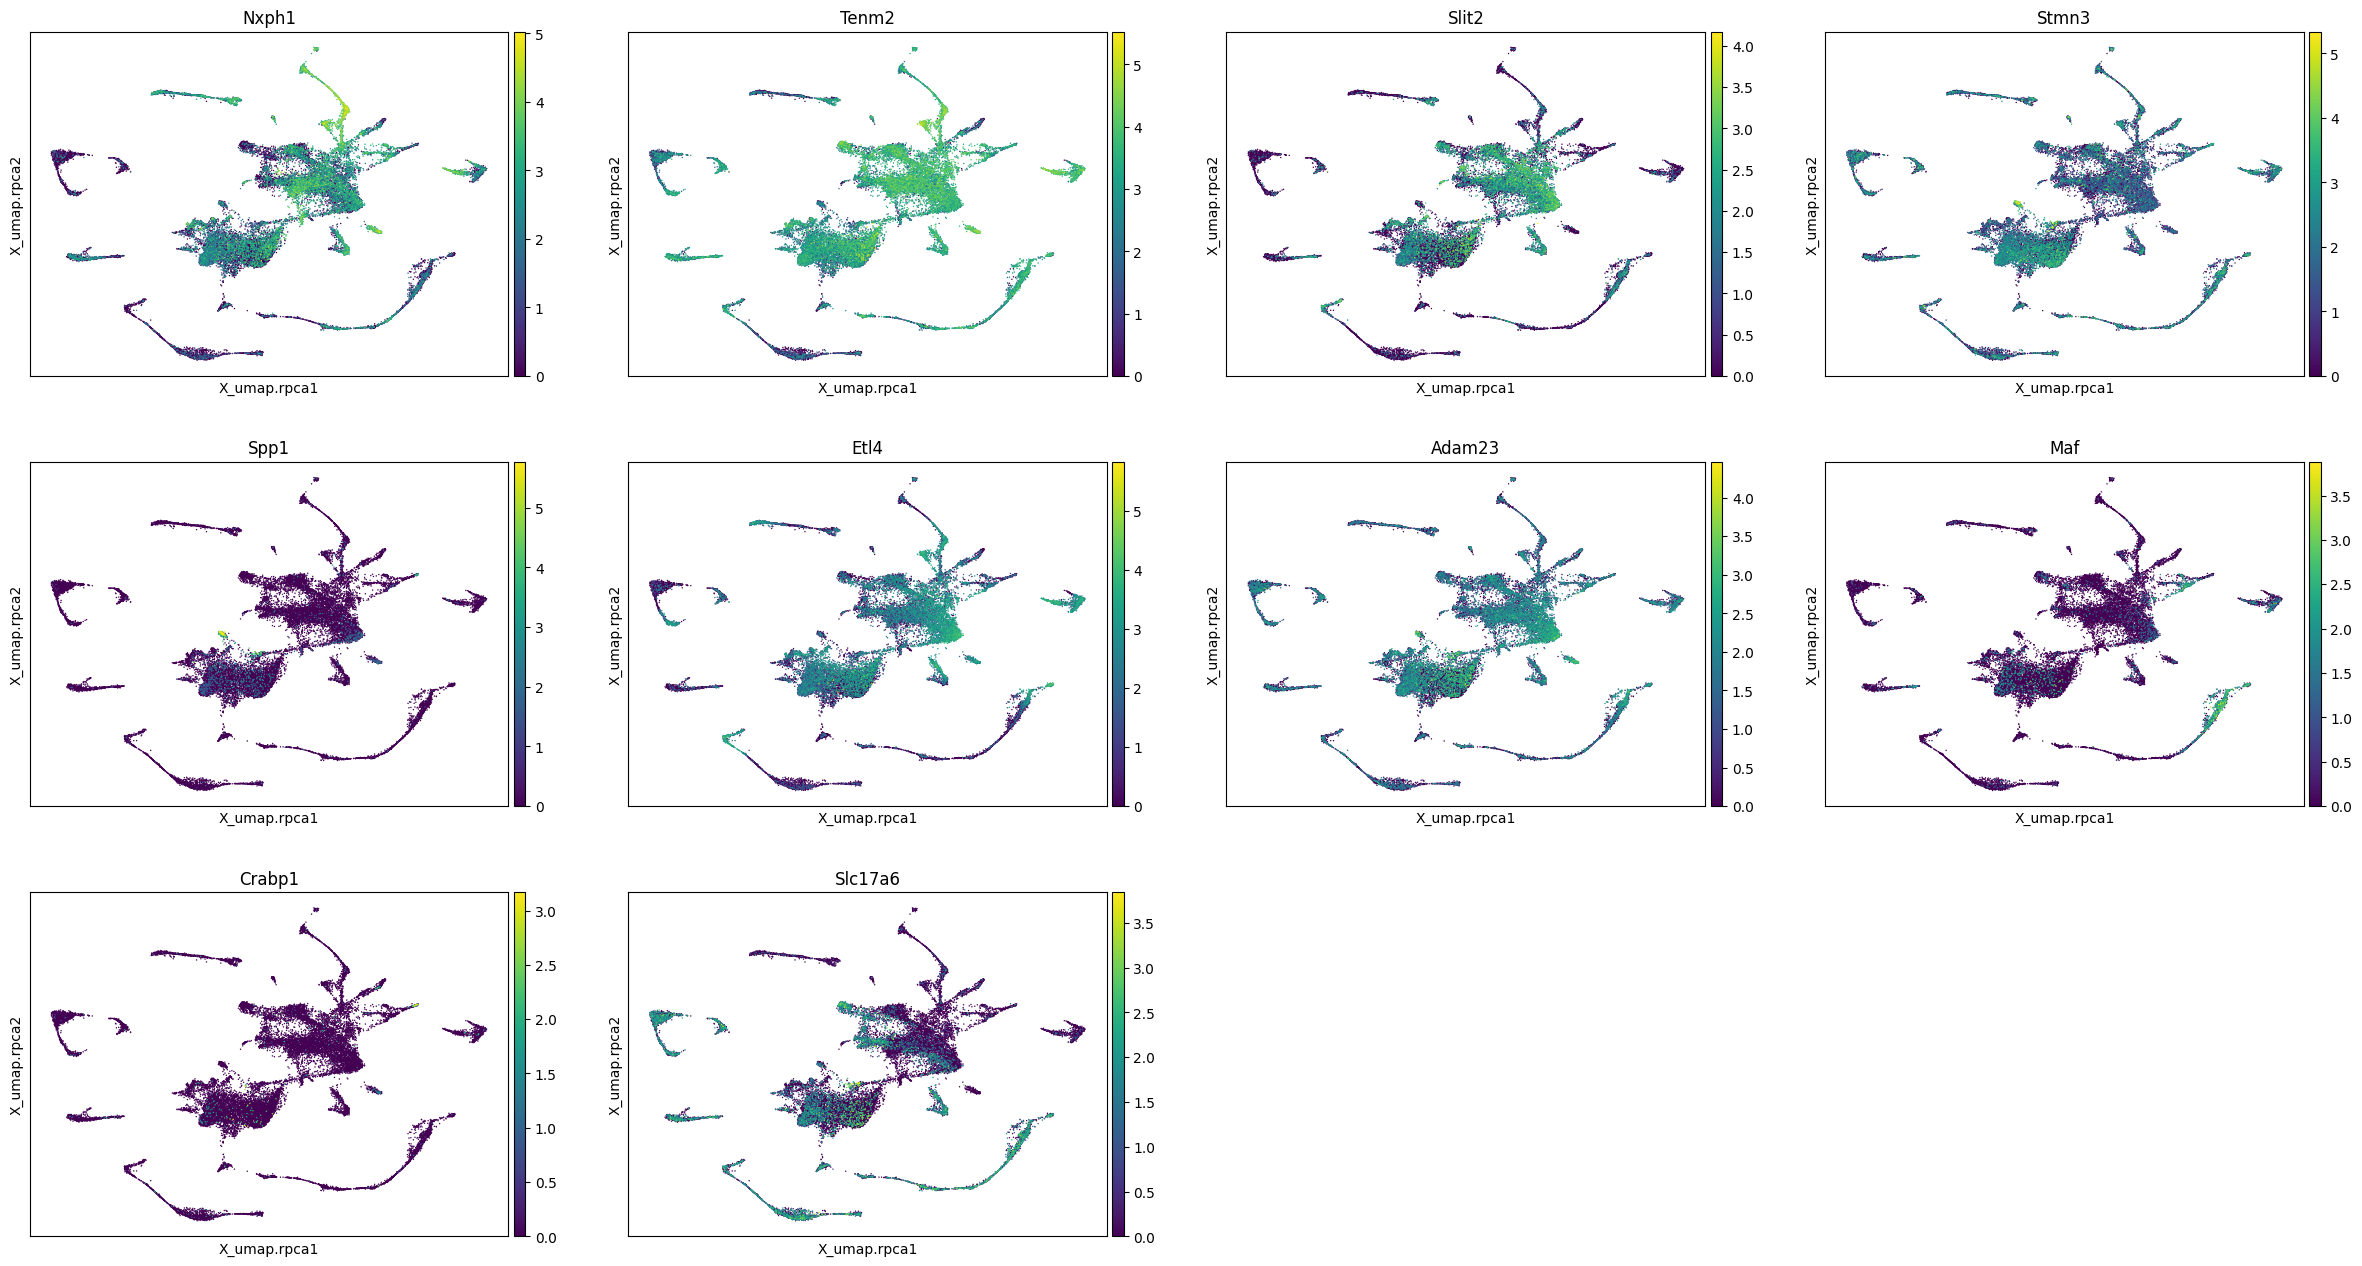

In [16]:
sc.pl.embedding(mouse_neurons, basis='X_umap.rpca', color = genes_skinnider )

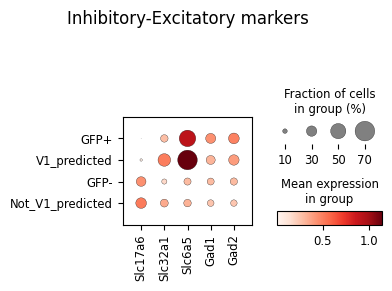

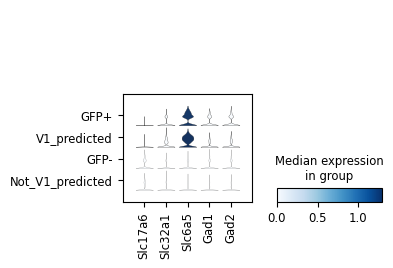

In [45]:
# Check if these neurons are indeed inhibitory neurons

inh_genes = ['Slc17a6', 'Slc32a1', 'Slc6a5', 'Gad1', 'Gad2']

sc.pl.dotplot(mouse_neurons, inh_genes, groupby='annotation', title='Inhibitory-Excitatory markers', save = 'mouse_inhibitory_neuronal_markers.svg')

sc.pl.stacked_violin(mouse_neurons, inh_genes, groupby='annotation', save = 'mouse_inhibitory_neuronal_markers.svg')

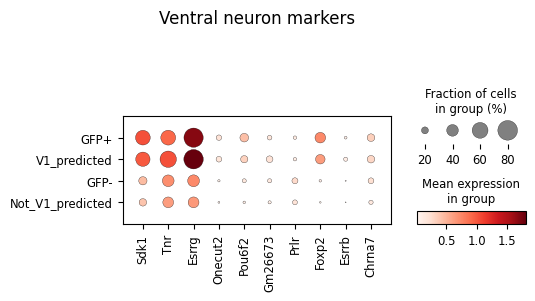

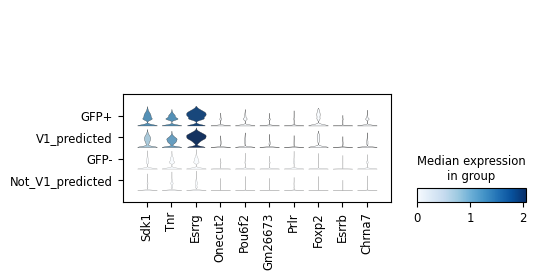

In [57]:
ventral_genes = ['Sdk1',
'Tnr',
'Esrrg',
'Onecut2',
'Pou6f2',
'Gm26673',
'Prlr',
'Foxp2',
'Esrrb',
'Chrna7',
]

sc.pl.dotplot(mouse_neurons, ventral_genes, groupby='annotation', title= 'Ventral neuron markers', save = 'mouse_ventral_neuronal_markers.svg')

sc.pl.stacked_violin(mouse_neurons, ventral_genes, groupby='annotation', save = 'mouse_ventral_neuronal_markers.svg')

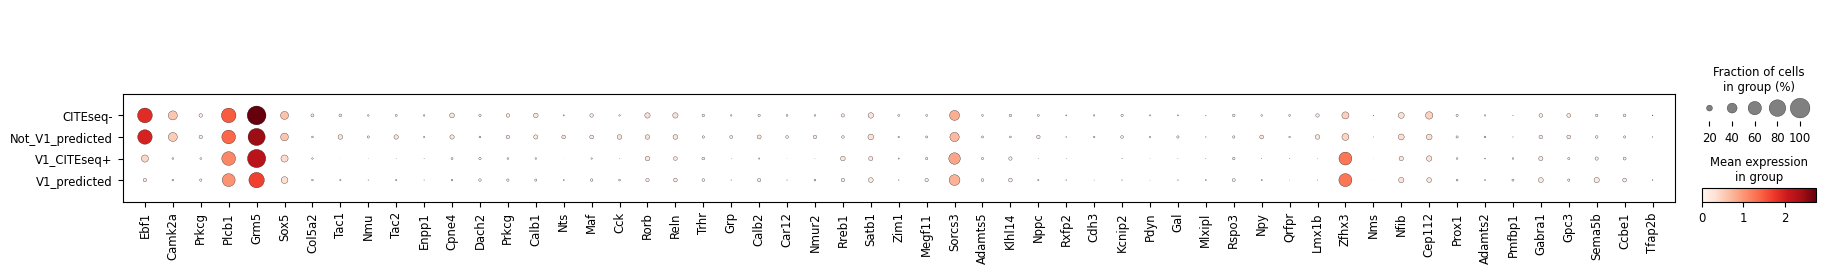

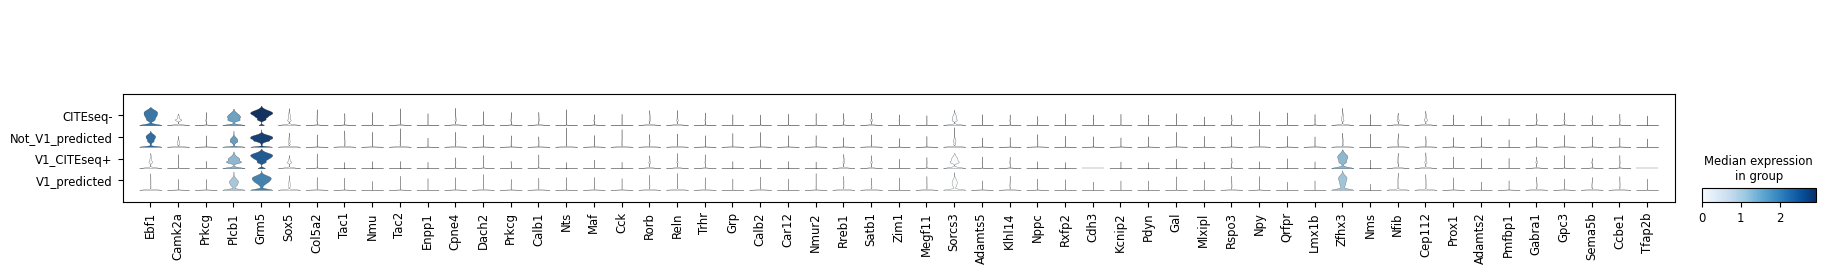

In [19]:
# Check if they are dorsal neurons
dorsal_genes = ['Ebf1',
'Camk2a',
'Prkcg',
'Plcb1',
'Grm5',
'Sox5',
'Col5a2',
'Tac1',
'Nmu',
'Tac2',
'Enpp1',
'Cpne4',
'Dach2',
'Prkcg',
'Calb1',
'Nts',
'Maf',
'Cck',
'Rorb',
'Reln',
'Trhr',
'Grp',
'Calb2',
'Car12',
'Nmur2',
'Rreb1',
'Satb1',
'Zim1',
'Megf11',
'Sorcs3',
'Adamts5',
'Klhl14',
'Nppc',
'Rxfp2',
'Cdh3',
'Kcnip2',
'Pdyn',
'Gal',
'Mlxipl',
'Rspo3',
'Npy',
'Qrfpr',
'Lmx1b',
'Zfhx3',
'Nms',
'Nfib',
'Cep112',
'Prox1',
'Adamts2',
'Pmfbp1',
'Gabra1',
'Gpc3',
'Sema5b',
'Ccbe1',
'Tfap2b'
]


sc.pl.dotplot(mouse_neurons, dorsal_genes, groupby='annotation')

sc.pl.stacked_violin(mouse_neurons, dorsal_genes, groupby='annotation')

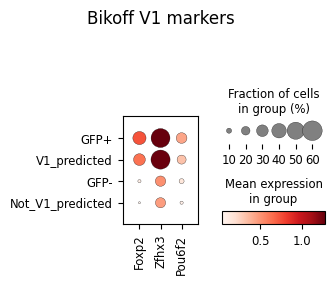

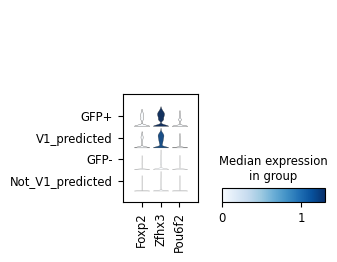

In [46]:
genes_bikoff = ['Foxp2', 'Zfhx3', 'Pou6f2'] #  'Oc1', 'Oc2'

sc.pl.dotplot(mouse_neurons, genes_bikoff, groupby='annotation', title = 'Bikoff V1 markers', save = 'mouse_bikoff_V1_markers.svg')

sc.pl.stacked_violin(mouse_neurons, genes_bikoff, groupby='annotation', save = 'mouse_bikoff_V1_markers.svg')

In [58]:
all_markers = inh_genes + ventral_genes + genes_bikoff

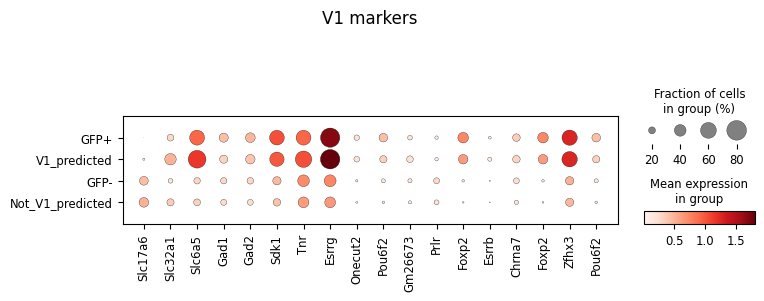

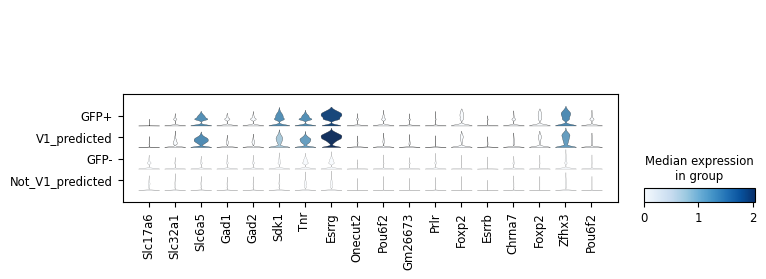

In [61]:
sc.pl.dotplot(mouse_neurons, all_markers, groupby='annotation', title = 'V1 markers', save = 'mouse_all_V1_markers.svg', cmap = 'Reds')

sc.pl.stacked_violin(mouse_neurons, all_markers, groupby='annotation', save = 'mouse_all_V1_markers.svg')

In [36]:
mouse_neurons.obs['annotation'].value_counts()

annotation
Not_V1_predicted    20795
CITEseq-             3243
V1_predicted         2369
V1_CITEseq+          1814
Name: count, dtype: int64

# Human

In [7]:
# Load cross-species data
cross_species_annotated = sc.read_h5ad(ROOT + 'data/annotated_data/cross_species_all_sets_common_genes_final.h5ad')

In [8]:
cross_species_annotated = sc.concat([cross_species_annotated])

In [9]:
cross_species_annotated

AnnData object with n_obs × n_vars = 85510 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'RNA_snn_res.2', 'seurat_clusters', 'training_labels', 'annotation', 'predicted_labels_xgb', 'predicted_annotation'
    obsm: 'X_pca', 'X_rpca', 'X_umap.rpca'

In [10]:
cross_species_annotated.obs['orig.ident'].value_counts()

orig.ident
KNAF8                            9295
KNAF12_Humain-P11_NeuN_180325    8688
GSM7474503                       6784
KNAF17_Humain-P8_NeuN_130525     6176
KNAF13                           6039
KNAF15                           5951
KNAF14                           5706
KNAF9                            5153
KNAF16_Humain-P10_NeuN_130525    4822
GSE7474501                       4260
ZHANG                            3663
YADAV                            3555
KNAF3                            3265
KNAF11_Humain-P13_NeuN_221124    2598
KATHE                            2331
MATSON                           2305
KNAF4                            1820
KNAF10_Humain-P12_NeuN_221124    1682
BOUV5                            1417
Name: count, dtype: int64

In [11]:
# Restrict to human neurons
human_neurons = cross_species_annotated[cross_species_annotated.obs['species'] == 'human']

In [12]:
human_neurons.obs['predicted_annotation'].value_counts()

predicted_annotation
Not_V1_predicted    56057
V1_predicted         1232
Name: count, dtype: int64

In [13]:
human_neurons = human_neurons[human_neurons.obs['predicted_annotation'].notna()]
human_neurons.X = human_neurons.X.astype(np.float64)
# Logarithmize the data
human_neurons= sc.pp.log1p(human_neurons, copy=True)

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\anndata\_core\anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a view which has non-unique indices. The resulting `adata.X` will likely not equal the value to which you set it. To avoid this potential issue, please make a copy of the data first. In the future, this operation will throw an error.
  warnings.warn(msg, FutureWarning, stacklevel=1)
c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\preprocessing\_simple.py:387: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


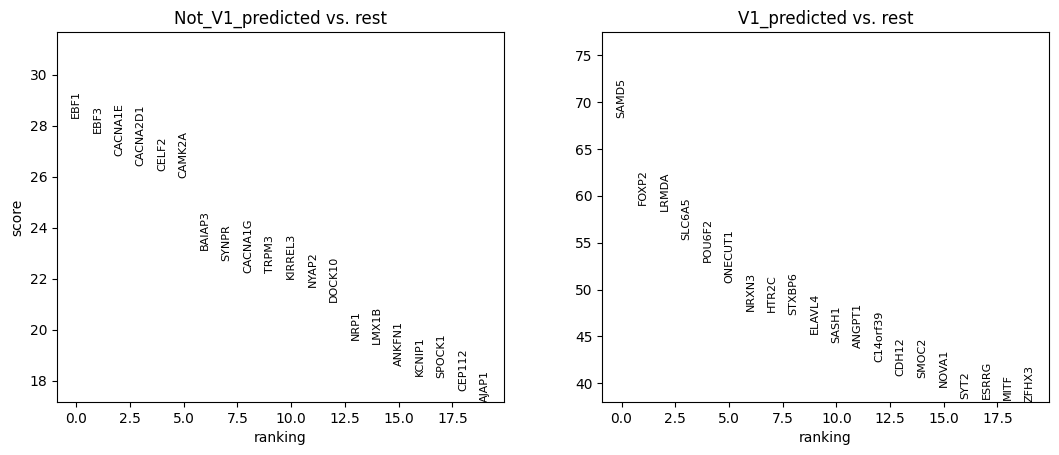

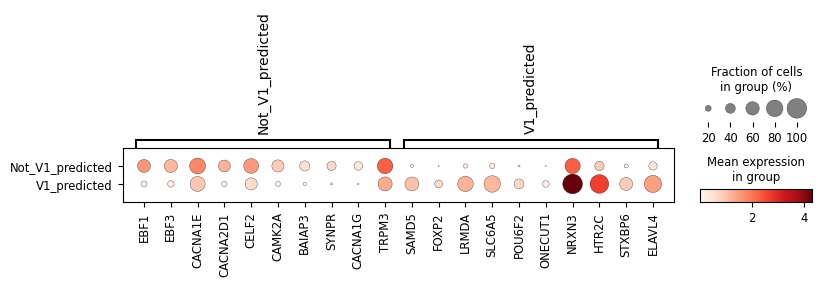

In [14]:
# Find markers for the V1 group
sc.tl.rank_genes_groups(human_neurons, groupby='predicted_annotation', method = 'wilcoxon', tie_correct=True)
sc.tl.filter_rank_genes_groups(human_neurons, min_fold_change=3)
sc.pl.rank_genes_groups(human_neurons, n_gees=25, sharey=False)
sc.pl.rank_genes_groups_dotplot(human_neurons)

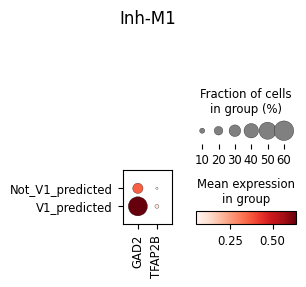

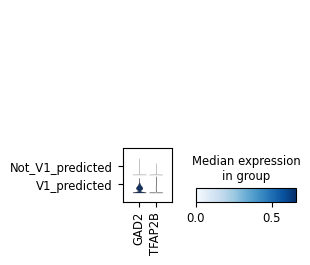

In [15]:
InhMone_genes = ['GAD2', 'TFAP2B'] 


sc.pl.dotplot(human_neurons, InhMone_genes, groupby='predicted_annotation', title = 'Inh-M1')

sc.pl.stacked_violin(human_neurons, InhMone_genes, groupby='predicted_annotation')

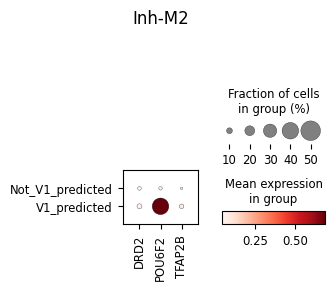

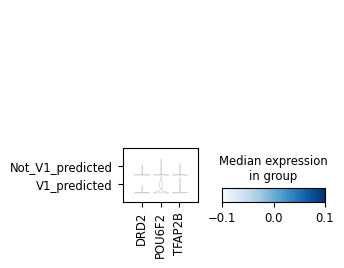

In [16]:
InhMtwo_genes = ['DRD2', 'POU6F2','TFAP2B'] 


sc.pl.dotplot(human_neurons, InhMtwo_genes, groupby='predicted_annotation', title = 'Inh-M2')

sc.pl.stacked_violin(human_neurons, InhMtwo_genes, groupby='predicted_annotation')

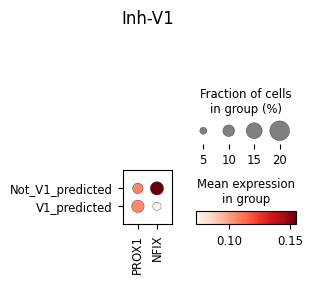

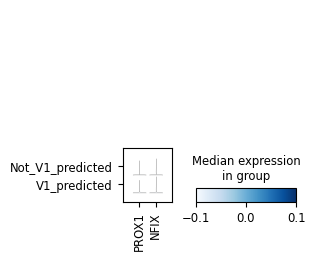

In [17]:
InhVone_genes = ['PROX1', 'NFIX']

sc.pl.dotplot(human_neurons, InhVone_genes, groupby='predicted_annotation', title = 'Inh-V1')

sc.pl.stacked_violin(human_neurons, InhVone_genes, groupby='predicted_annotation')


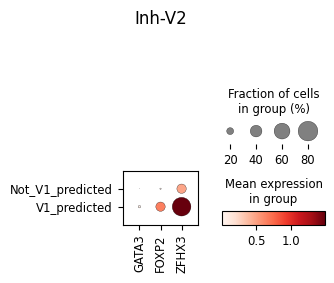

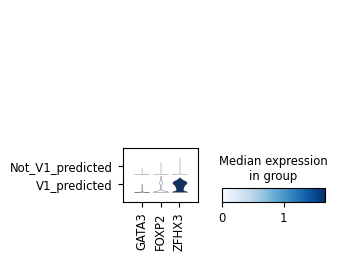

In [18]:
InhVtwo_genes = ['GATA3', 'FOXP2', 'ZFHX3']

sc.pl.dotplot(human_neurons, InhVtwo_genes, groupby='predicted_annotation', title = 'Inh-V2')

sc.pl.stacked_violin(human_neurons, InhVtwo_genes, groupby='predicted_annotation')

In [20]:
InhVthree_genes = ['GAS1RR', 'ASAH2', 'ZFHX3']

sc.pl.dotplot(human_neurons, InhVthree_genes, groupby='predicted_annotation', title = 'Inh-V3')

sc.pl.stacked_violin(human_neurons, InhVthree_genes, groupby='predicted_annotation')


KeyError: "Could not find keys [np.str_('ASAH2'), np.str_('GAS1RR')] in columns of `adata.obs` or in adata.raw.var_names."

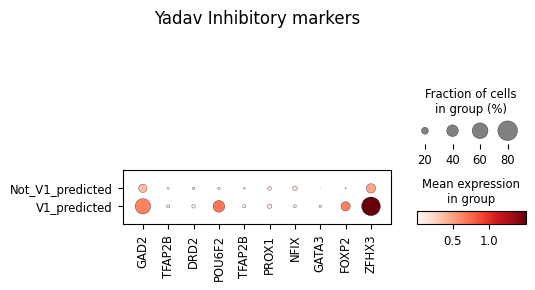

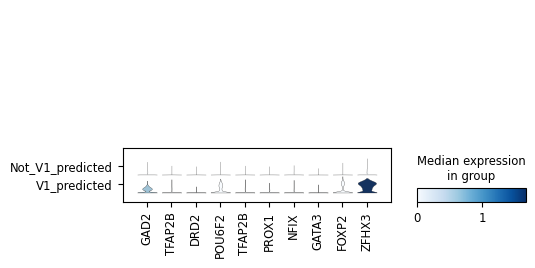

In [21]:
Inh_genes = InhMone_genes+ InhMtwo_genes+InhVone_genes+InhVtwo_genes

sc.pl.dotplot(human_neurons, Inh_genes, groupby='predicted_annotation', title='Yadav Inhibitory markers')

sc.pl.stacked_violin(human_neurons, Inh_genes, groupby='predicted_annotation')

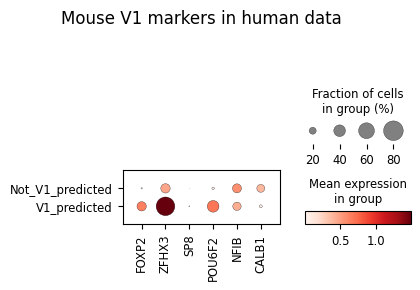

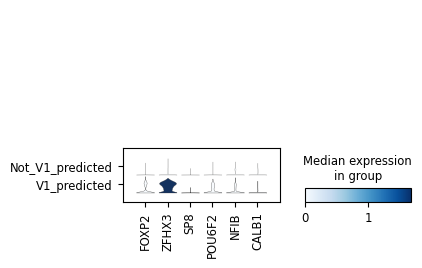

In [22]:
genes_bikoff = ['FOXP2', 'ZFHX3', 'SP8', 'POU6F2', 'NFIB', 'CALB1']

sc.pl.dotplot(human_neurons, genes_bikoff, groupby='predicted_annotation', title= 'Mouse V1 markers in human data')

sc.pl.stacked_violin(human_neurons, genes_bikoff, groupby='predicted_annotation')

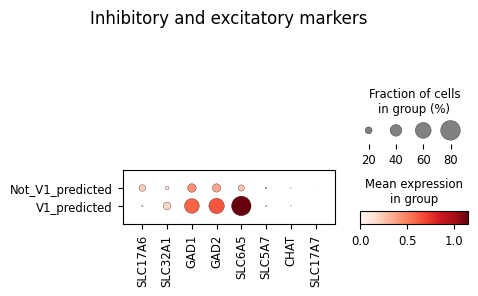

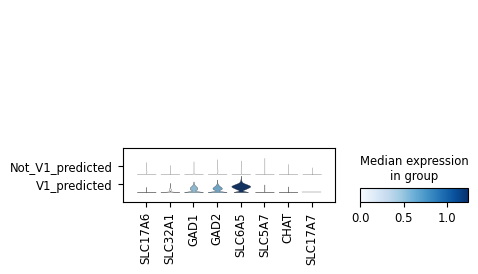

In [23]:
inh_exh = ['SLC17A6', 'SLC32A1', 'GAD1', 'GAD2', 'SLC6A5', 'SLC5A7', 'CHAT', 'SLC17A7']
sc.pl.dotplot(human_neurons, inh_exh, groupby='predicted_annotation', title= 'Inhibitory and excitatory markers')

sc.pl.stacked_violin(human_neurons, inh_exh, groupby='predicted_annotation')

In [ ]:
for g in inh_exh:
    sc.tl.score_genes(human_neurons, gene_list=[g], score_name=g+'_score')

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_score_genes.py:169: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


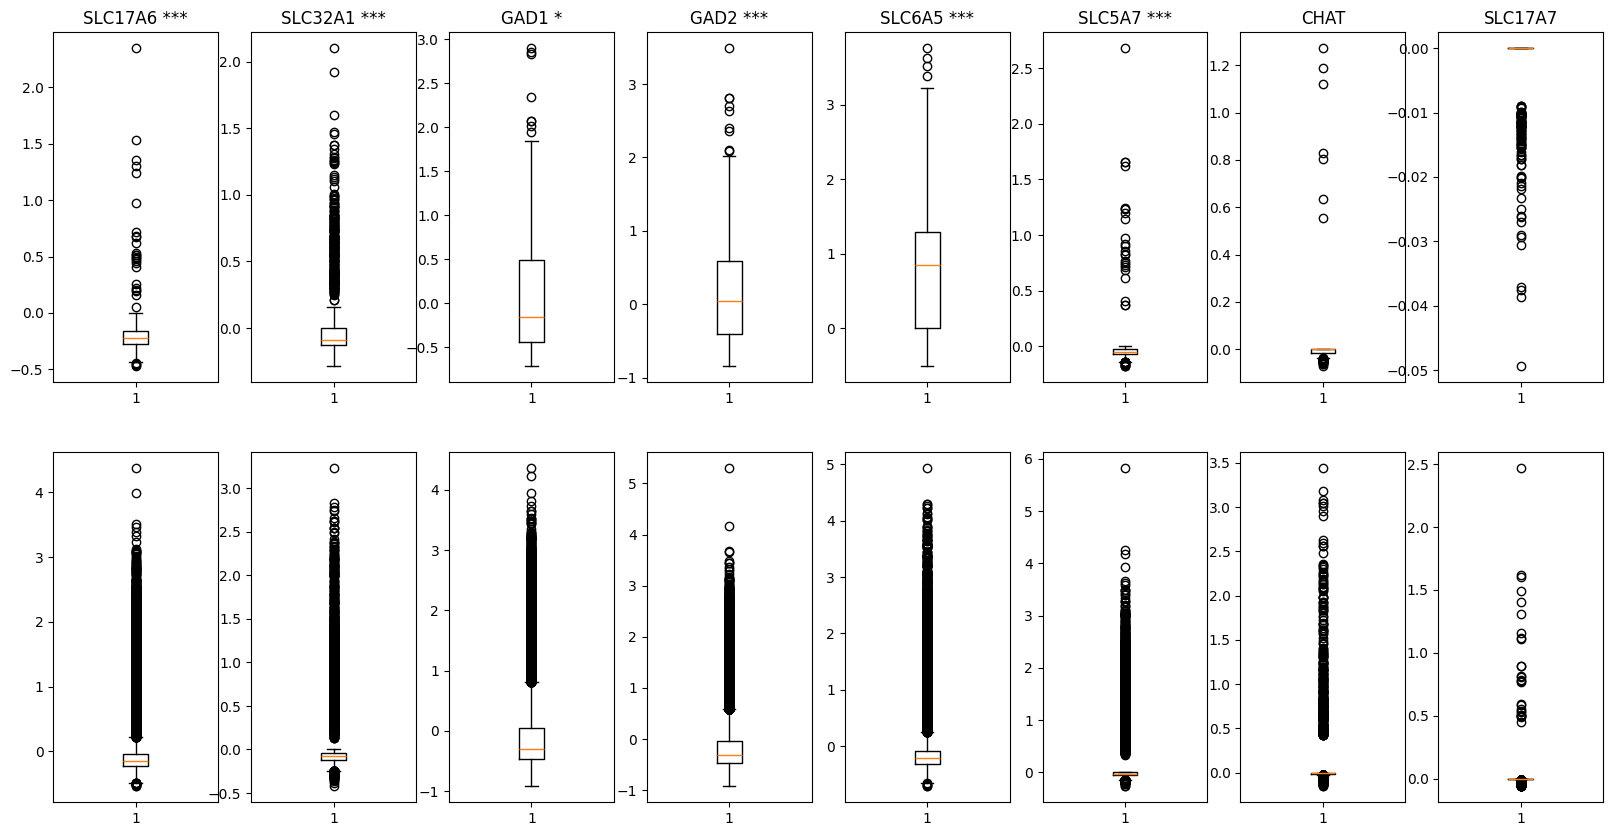

In [ ]:
fig, ax = plt.subplots(2, len(inh_exh), figsize = (20,10))
for i,g in enumerate(inh_exh):
    x = human_neurons[human_neurons.obs['predicted_annotation'] == 'V1_predicted'].obs[g+'_score']
    y = human_neurons[human_neurons.obs['predicted_annotation'] == 'Not_V1_predicted'].obs[g+'_score']
    ax[0,i].boxplot(x)
    ax[1,i].boxplot(y)
    ttest = sps.ttest_ind(x,y)
    if ttest.pvalue <0.001:
        ax[0,i].set_title(g+' ***')
    elif ttest.pvalue < 0.01:
        ax[0,i].set_title(g+' **')
    elif ttest.pvalue < 0.05:
        ax[0,i].set_title(g+' *')
    else:
        ax[0,i].set_title(g)

In [24]:
# restrict to only V1 neurons
V1_human = human_neurons[human_neurons.obs['predicted_annotation'] == 'V1_predicted']

In [29]:
V1_human

AnnData object with n_obs × n_vars = 1232 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'RNA_snn_res.2', 'seurat_clusters', 'training_labels', 'annotation', 'predicted_labels_xgb', 'predicted_annotation'
    uns: 'log1p', 'rank_genes_groups', 'rank_genes_groups_filtered', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_rpca', 'X_umap.rpca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [26]:
# Compute pca and umap representations
sc.neighbors.neighbors(V1_human, use_rep = 'X_rpca')
sc.tl.umap(V1_human)

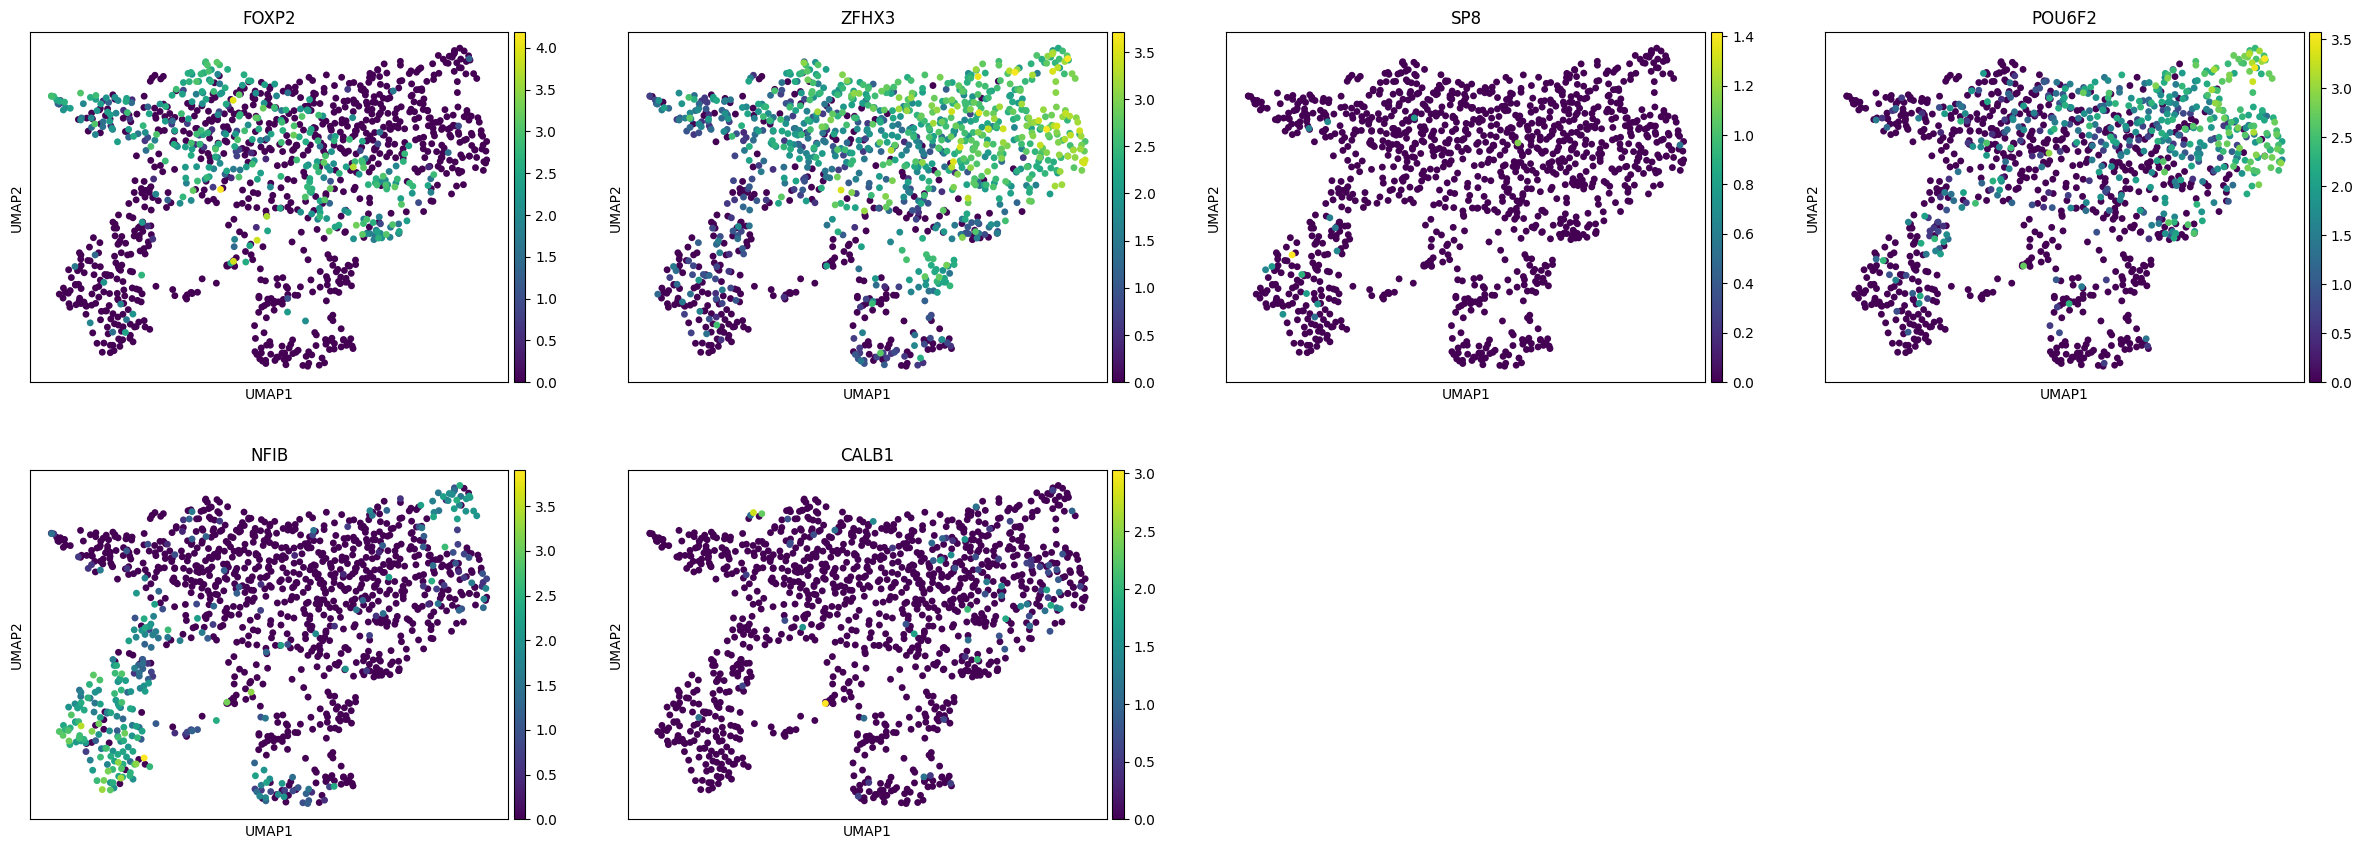

In [27]:
sc.pl.umap(V1_human, color = genes_bikoff)

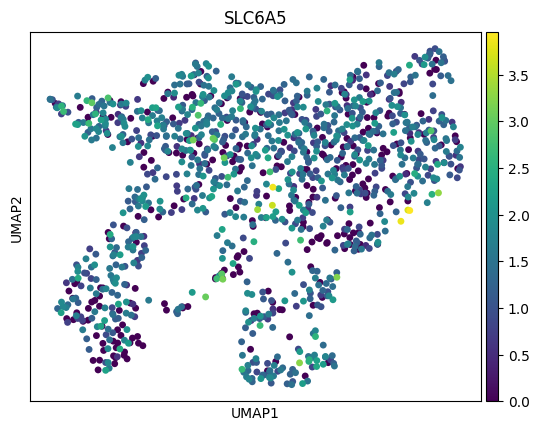

In [28]:
sc.pl.umap(V1_human, color = 'SLC6A5')